In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd


In [3]:
dataset_path = "/kaggle/input/fakeaudio"

In [4]:
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}, Files: {len(files)}")


Directory: /kaggle/input/fakeaudio, Files: 0
Directory: /kaggle/input/fakeaudio/generated_audio, Files: 0
Directory: /kaggle/input/fakeaudio/generated_audio/jsut_parallel_wavegan, Files: 5000
Directory: /kaggle/input/fakeaudio/generated_audio/common_voices_prompts_from_conformer_fastspeech2_pwg_ljspeech, Files: 16283
Directory: /kaggle/input/fakeaudio/generated_audio/common_voices_prompts_from_conformer_fastspeech2_pwg_ljspeech/generated, Files: 16283
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_melgan_large, Files: 13100
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_waveglow, Files: 13100
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_parallel_wavegan, Files: 13100
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_full_band_melgan, Files: 13100
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_hifiGAN, Files: 13100
Directory: /kaggle/input/fakeaudio/generated_audio/ljspeech_melgan, Files: 13100
Directory: /kaggle/input/fake

Available Categories: ['jsut_parallel_wavegan', 'common_voices_prompts_from_conformer_fastspeech2_pwg_ljspeech', 'ljspeech_melgan_large', 'ljspeech_waveglow', 'ljspeech_parallel_wavegan', 'ljspeech_full_band_melgan', 'ljspeech_hifiGAN', 'ljspeech_melgan', 'ljspeech_multi_band_melgan', 'jsut_multi_band_melgan']

Sample files from jsut_parallel_wavegan: ['BASIC5000_2691_gen.wav', 'BASIC5000_0071_gen.wav', 'BASIC5000_4970_gen.wav', 'BASIC5000_2585_gen.wav', 'BASIC5000_2913_gen.wav']


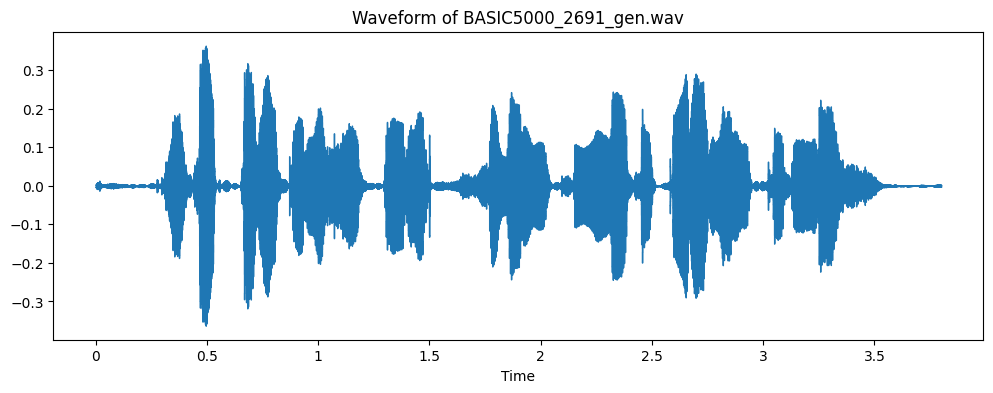

In [5]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Set base directory
base_dir = "/kaggle/input/fakeaudio/generated_audio/"

# List available subdirectories (categories)
categories = os.listdir(base_dir)
print("Available Categories:", categories)

# Select a category and list some files
selected_category = categories[0]  # Change this if needed
category_path = os.path.join(base_dir, selected_category)
sample_files = os.listdir(category_path)[:5]  # Show 5 sample files
print(f"\nSample files from {selected_category}: {sample_files}")

# Load and visualize an audio sample
sample_file = os.path.join(category_path, sample_files[0])
audio, sr = librosa.load(sample_file, sr=None)

# Display waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f"Waveform of {sample_files[0]}")
plt.show()

# Listen to the sample
ipd.Audio(audio, rate=sr)


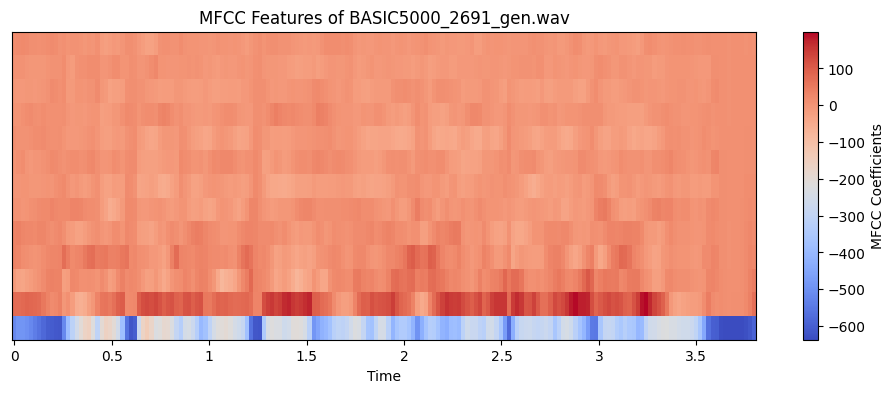

In [6]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title(f"MFCC Features of {sample_files[0]}")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Function to extract MFCC features from an audio file
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)  # Take mean across time
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Iterate over multiple audio files and extract features
data = []
labels = []

for category in tqdm(categories[:3]):  # Limiting to 3 categories for now
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)[:100]  # Extract features from 100 samples per category

    for file in files:
        file_path = os.path.join(category_path, file)
        features = extract_features(file_path)
        
        if features is not None:
            data.append(features)
            labels.append(category)

# Convert to DataFrame
df = pd.DataFrame(data)
df["Label"] = labels
print(df.head())

# Save extracted features to a CSV file for training
df.to_csv("audio_features.csv", index=False)
print("Feature extraction complete. Saved as 'audio_features.csv'.")


100%|██████████| 3/3 [00:06<00:00,  2.21s/it]

            0           1          2          3         4         5         6  \
0 -352.673676   82.118713  17.306114  17.872408  9.045414  3.675846 -9.997930   
1 -354.077454   91.302711   6.963632  10.725054  2.179819  1.049299 -4.629889   
2 -370.340424   80.249512   4.212466  17.323662  1.606445  4.992658 -4.486060   
3 -400.829163   93.361664  30.371677   9.970880  7.725295  3.509475 -2.830270   
4 -376.338776  101.365051  19.073967  12.368248  4.647585  8.732901 -5.511882   

          7          8         9        10        11        12  \
0  4.190805 -11.665502  3.589613 -3.732125 -1.968729  0.990730   
1 -1.000021 -14.594343  7.156108 -7.135633 -1.431611  3.166083   
2 -0.761757  -9.245925  1.394675 -5.893020  1.225876 -0.618336   
3  2.391893 -13.056301  4.810508 -0.947217  0.605383  3.050224   
4  0.930181 -15.693203  2.026182 -2.863805 -1.834332  2.156359   

                   Label  
0  jsut_parallel_wavegan  
1  jsut_parallel_wavegan  
2  jsut_parallel_wavegan  
3  jsut_

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load extracted features
df = pd.read_csv("audio_features.csv")

# Encode labels
encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])

# Split dataset into train and test sets
X = df.drop(columns=["Label"]).values
y = df["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9833
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      1.00      1.00        22
           2       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical values
y_cnn = to_categorical(y, num_classes=len(np.unique(y)))

# Reshape input for CNN (adding channel dimension)
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)


In [14]:
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4119 - loss: 6.0681 - val_accuracy: 0.6333 - val_loss: 1.3145
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5451 - loss: 2.2640 - val_accuracy: 0.6333 - val_loss: 0.9210
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6826 - loss: 1.3238 - val_accuracy: 0.7500 - val_loss: 0.7468
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6411 - loss: 1.2255 - val_accuracy: 0.8167 - val_loss: 0.4443
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7315 - loss: 0.7440 - val_accuracy: 0.7167 - val_loss: 0.5553
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7342 - loss: 0.6038 - val_accuracy: 0.8833 - val_loss: 0.3090
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8050 - loss: 0.3830 - val_accuracy: 0.8833 - val_loss: 0.3104
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8603 - loss: 0.3450 - val_accuracy: 0.7833 - val_loss: 0.3849
Epoch 9

In [15]:
# Evaluate performance
y_pred_cnn = np.argmax(model_cnn.predict(X_test_cnn), axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

accuracy_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")
print("Classification Report:\n", classification_report(y_true_cnn, y_pred_cnn))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
CNN Model Accuracy: 0.8833
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       1.00      1.00      1.00        22
           2       0.78      0.95      0.86        22

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60



In [16]:
from tensorflow.keras.layers import LSTM

# Reshape for LSTM (batch_size, timesteps, features)
X_lstm = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_cnn, test_size=0.2, random_state=42)


In [17]:
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(128),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.4056 - loss: 1.0238 - val_accuracy: 0.8667 - val_loss: 0.7072
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7478 - loss: 0.6339 - val_accuracy: 0.8500 - val_loss: 0.4043
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7886 - loss: 0.4378 - val_accuracy: 0.8333 - val_loss: 0.3403
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8390 - loss: 0.3836 - val_accuracy: 0.8500 - val_loss: 0.3024
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8498 - loss: 0.3070 - val_accuracy: 0.9333 - val_loss: 0.2326
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9257 - loss: 0.2136 - val_accuracy: 0.9167 - val_loss: 0.1700
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9317 - loss: 0.1742 - val_accuracy: 0.9500 - val_loss: 0.1429
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9444 - loss: 0.1357 - val_accuracy: 0.9333 - val_loss: 0.1394
Epoch 9/20


In [18]:
y_pred_lstm = np.argmax(model_lstm.predict(X_test_lstm), axis=1)
y_true_lstm = np.argmax(y_test_lstm, axis=1)

accuracy_lstm = accuracy_score(y_true_lstm, y_pred_lstm)
print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")
print("Classification Report:\n", classification_report(y_true_lstm, y_pred_lstm))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step
LSTM Model Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      1.00      1.00        22
           2       1.00      0.82      0.90        22

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.95      0.93      0.93        60



In [19]:
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"LSTM Accuracy: {accuracy_lstm:.4f}")


Random Forest Accuracy: 0.9833
CNN Accuracy: 0.8833
LSTM Accuracy: 0.9333


In [20]:
model_cnn.save("deepfake_audio_cnn.h5")
model_lstm.save("deepfake_audio_lstm.h5")
